In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Read CSV file as DataFrame

In [15]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [16]:
num_companies = df['Company Name'].nunique()
print("Number of different companies:", num_companies)

Number of different companies: 439


Download the data set about Value of Energy Cost Saving Program for businesses in New York City (under the "Export" option, there is a way to retrieve a CSV file). Answer the following questions.

How many different companies are represented in the data set?
What is the total number of jobs created for businesses in Queens?
How many different unique email domains names are there in the data set?
Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
Save your result for the previous question as a CSV file.

In [17]:
queens_jobCreated = df[df['Borough'] == 'Queens']['Job created']
total_queensJob = queens_jobCreated.sum()
print ('total number of Jobs created for businesses in Queens: ', total_queensJob)

total number of Jobs created for businesses in Queens:  102.0


In [18]:
#Create new df column 'email domain'
df['Email Domain'] = df['company email'].str.split('@').str[1]
unique_emails = df['Email Domain'].nunique()
print ('Number of unique company emails: ', unique_emails)


Number of unique company emails:  356


In [19]:
#Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
nta_counts = df['NTA'].value_counts()
ntas_with_at_least_5_businesses = nta_counts[nta_counts >= 5].index
filtered_df = df[df['NTA'].isin(ntas_with_at_least_5_businesses)]
nta_grp = filtered_df.groupby('NTA').agg({'Total Savings': 'mean', 'Job created': 'sum'})
nta_grp.reset_index(inplace=True)
nta_grp.columns = ['NTA', 'Average Total Savings', 'Total Jobs Created']

print("Average total savings and total jobs created for each NTA:")
nta_grp

Average total savings and total jobs created for each NTA:


,NTA,Average Total Savings,Total Jobs Created
0,Battery Park City-Lower Manhattan,469890.796667,0.0
1,Bushwick South,26140.455000,10.0
2,Carroll Gardens-Columbia Street-Red Hook,24337.390000,0.0
3,College Point,17159.372857,2.0
4,Crown Heights North,4036.298889,0.0
5,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,0.0
6,East New York,48433.093333,15.0
7,East Williamsburg,13990.626364,0.0
8,Greenpoint,9753.649286,0.0
9,Hunters Point-Sunnyside-West Maspeth,23931.398933,0.0


In [ ]:
##Save previous result to .csv file
nta_grp.to_csv('nta_results.csv', index=False)

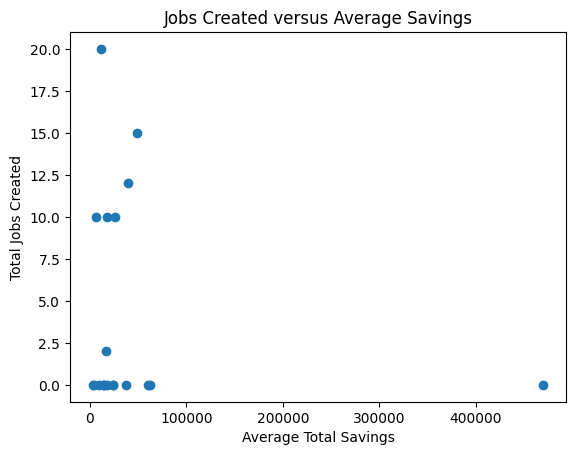

In [21]:
##DAY 5 START : MATPLOTLIB
##Scatter Plot
plt.scatter(nta_grp['Average Total Savings'], nta_grp['Total Jobs Created'])
plt.xlabel('Average Total Savings')
plt.ylabel('Total Jobs Created')
plt.title('Jobs Created versus Average Savings')
plt.show()

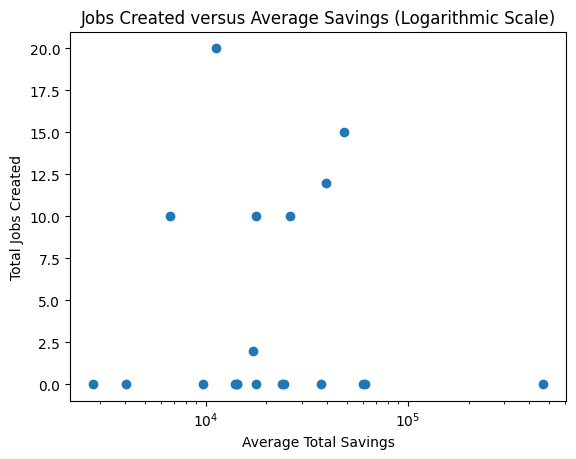

In [22]:
##logarithmic Scale
plt.scatter(nta_grp['Average Total Savings'], nta_grp['Total Jobs Created'])
plt.xlabel('Average Total Savings')
plt.ylabel('Total Jobs Created')
plt.title('Jobs Created versus Average Savings (Logarithmic Scale)')
plt.xscale('log')
plt.show()

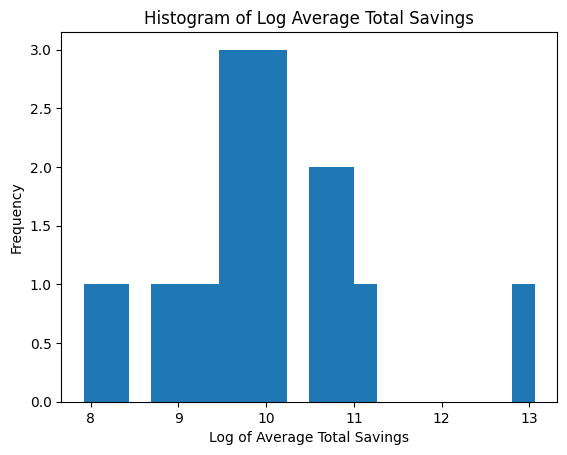

In [28]:
## Histogram
log_savings = np.log(nta_grp['Average Total Savings'])
plt.hist(log_savings, bins=20)
plt.xlabel('Log of Average Total Savings')
plt.ylabel('Frequency')
plt.title('Histogram of Log Average Total Savings')
plt.show()

In [51]:
#Create new df column 'dates'
df['Month'] = df['Effective Date']
month_df = df['Month']
month_df

0      03/04/2005
1      04/02/2008
2      01/05/2015
3      02/03/2020
4      06/30/2017
          ...    
445    12/09/2008
446    12/05/2017
447    08/03/2018
448    01/26/2016
449    10/03/2019
Name: Month, Length: 450, dtype: object

In [68]:
##Line Plot line plot of the total jobs created for each month.
# Convert 'Effective Date' to datetime format
df['Effective Date'] = pd.to_datetime(df['Effective Date'])
# Extract the month from 'Effective Date'
df['Month'] = df['Effective Date'].dt.month
# Calculate total jobs created per month
monthly_jobs_created = df.groupby('Month')['Job created'].sum()
# Print the resulting Series
print(monthly_jobs_created)

Month
1      0.0
2     27.0
3     20.0
4      2.0
5      2.0
6     63.0
7     20.0
8      0.0
9      0.0
10     0.0
11     5.0
12    10.0
Name: Job created, dtype: float64


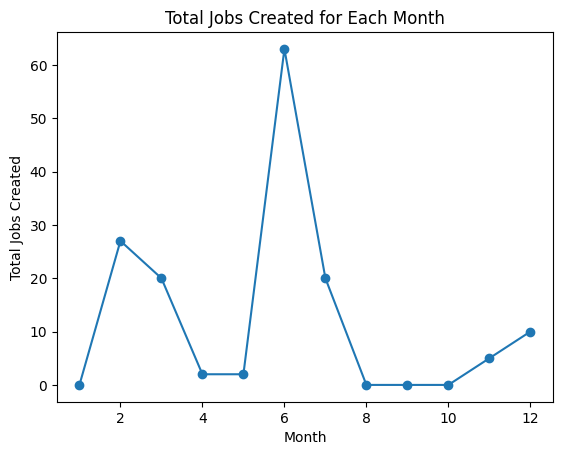

In [65]:
##Line Plotting
plt.plot(monthly_jobs_created.index, monthly_jobs_created.values, marker='o', linestyle='-')

# Set the x-axis label, y-axis label, and plot title
plt.xlabel('Month')
plt.ylabel('Total Jobs Created')
plt.title('Total Jobs Created for Each Month')

# Show the plot
plt.show()